### Hierarchical clustering (input: data)  

#### Import libraries  

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

#### Parameters  

In [8]:
csv_in = '../../iniadMaterial/AI-0102/pandas_training-utf8.csv'

# To show more rows and columns
pd.options.display.max_rows = 999 
pd.options.display.max_columns = 999 

#### Read CSV file  

In [9]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=13, header=0)
print(df.shape)
print(df.info())
display(df.head())

(440, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CHANNEL    440 non-null    object
 1   REGION     440 non-null    object
 2   FRESH      440 non-null    int64 
 3   MILK       440 non-null    int64 
 4   GROCERY    440 non-null    int64 
 5   FROZEN     440 non-null    int64 
 6   DET_PAPER  440 non-null    int64 
 7   DELICA     440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB
None


,CHANNEL,REGION,FRESH,MILK,GROCERY,FROZEN,DET_PAPER,DELICA
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Horeca,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


#### Separate data  

In [10]:
df_data = df.loc[:, 'FRESH':]
print(df_data.shape)
display(df_data.head())
customers = df_data.index

(440, 6)


,FRESH,MILK,GROCERY,FROZEN,DET_PAPER,DELICA
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


#### Execute clustering  

In [16]:
Z = linkage(df_data, method='ward', metric='euclidean')
print(Z.shape)
n_data = Z.shape[0]
df_Z = pd.DataFrame(Z,
                    columns=['label1', 'label2',
                             'distance', '#members'],
                    index=['merged{}'.format(i+1+n_data) 
                           for i in range(n_data)])
df_Z['label1'] = df_Z['label1'].astype('int')
df_Z['label2'] = df_Z['label2'].astype('int')
df_Z['#members'] = df_Z['#members'].astype('int')
display(df_Z.head())
display(df_Z.tail())

(439, 4)


,label1,label2,distance,#members
merged440,97,98,278.915758,2
merged441,299,355,344.884038,2
merged442,114,217,412.889816,2
merged443,80,308,421.595778,2
merged444,134,146,437.592276,2


,label1,label2,distance,#members
merged874,867,869,118672.182005,261
merged875,868,871,162601.178953,45
merged876,870,873,181142.020350,134
merged877,874,875,253829.235837,306
merged878,876,877,281754.713514,440


#### Draw dendgrogram  

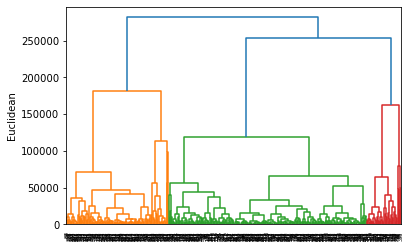

In [12]:
dendr = dendrogram(Z, labels=customers)
plt.xticks(rotation=90)
plt.ylabel('Euclidean')
plt.show()

#### Get results of clustering  

In [13]:
dist = df_Z['distance']
n_cluster = 2
print('=== n_cluster:', n_cluster, '===')
cls = pd.Series(fcluster(Z, n_cluster, criterion='maxclust'), index=customers)
print('dist:', dist[n_data-n_cluster])
print(cls.head())

=== n_cluster: 2 ===
dist: 253829.2358369034
0    2
1    2
2    2
3    2
4    1
dtype: int32


#### Make cross table  

In [14]:
ct = pd.crosstab(df['CHANNEL'], cls)
display(ct)

col_0,1,2
CHANNEL,,
Horeca,111,187
Retail,23,119
